## Домашнее задание к семинару 02 (HW02)
Тема: работа с табличными данными в Pandas, контроль качества данных, 
базовый EDA и визуализация в Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# Загружаем датасет
df = pd.read_csv('S02-hw-dataset.csv') 

print("Первые 5 строк датасета:")
display(df.head())

print("\nИнформация о датасете:")
df.info()

print("\nОписательные статистики:")
display(df.describe(include='all'))

Первые 5 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики:


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


In [ ]:
print("\nДоля пропусков в каждом столбце:")
missing_values = df.isna().mean()
display(missing_values)

print("\nКоличество полностью дублирующих строк:", df.duplicated().sum())

# Поиск подозрительных значений
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
negative_values = {}
for col in numeric_cols:
    if df[col].min() < 0:
        negative_values[col] = df[df[col] < 0].shape[0]
        
print("\nСтолбцы с отрицательными значениями:")
if negative_values:
    for col, count in negative_values.items():
        print(f"- {col}: {count} отрицательных значений")
else:
    print("Отрицательных значений не найдено")



Доля пропусков в каждом столбце:


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


Количество полностью дублирующих строк: 1

Столбцы с отрицательными значениями:
- purchases: 1 отрицательных значений


In [3]:
# Проверка нереалистичных значений
print("\nПодозрительные значения:")
if 'age' in df.columns:
    suspicious_age = df[df['age'] > 100]
    print(f"Количество записей с возрастом > 100 лет: {len(suspicious_age)}")
    if len(suspicious_age) > 0:
        display(suspicious_age.head())


Подозрительные значения:
Количество записей с возрастом > 100 лет: 1


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [8]:
# Базовый EDA
# Анализ категориальных переменных
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nЧастоты для категориальных переменных:")
for col in categorical_cols[:2]:
    print(f"\nСтолбец: {col}")
    display(df[col].value_counts(normalize=True) * 100)

# Группировка данных]
group_col = 'country'
agg_col = 'purchases'

grouped = df.groupby(group_col)[agg_col].agg(['mean', 'median', 'count'])
print(f"\nГруппировка по '{group_col}' со статистиками по '{agg_col}':")
display(grouped.sort_values('mean', ascending=False))


Частоты для категориальных переменных:

Столбец: country


country
RU    31.707317
FR    29.268293
US    19.512195
DE    14.634146
CN     4.878049
Name: proportion, dtype: float64


Группировка по 'country' со статистиками по 'purchases':


,mean,median,count
country,,,
DE,6.500000,6.0,6
RU,4.769231,6.0,13
US,4.625000,4.0,8
CN,4.500000,4.5,2
FR,4.250000,6.0,12


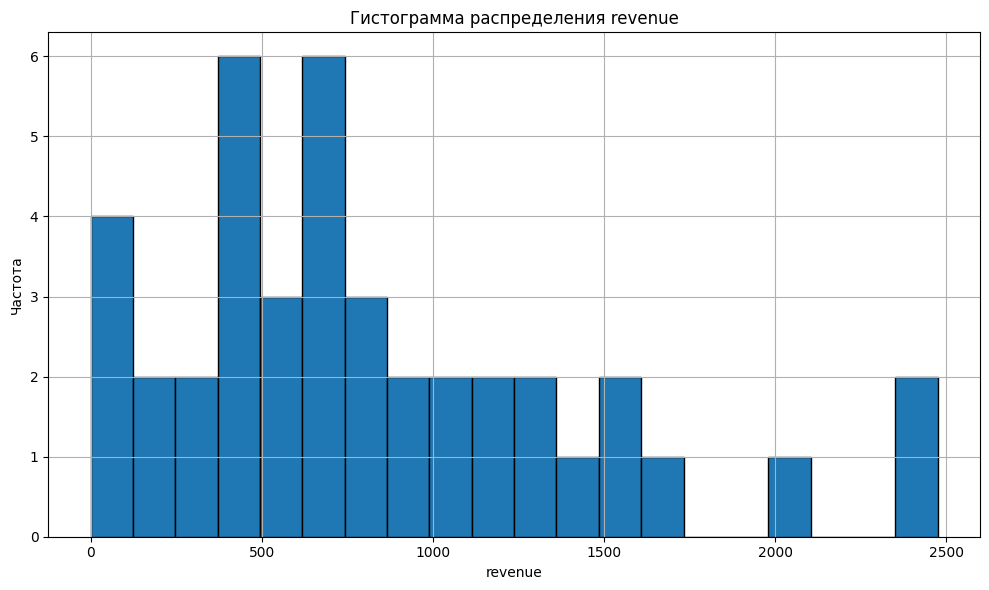

In [11]:
# 1. Гистограмма для revenue
if numeric_cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    df['revenue'].hist(bins=20, ax=ax, edgecolor='black')
    ax.set_title(f'Гистограмма распределения revenue')
    ax.set_xlabel('revenue')
    ax.set_ylabel('Частота')
    plt.tight_layout()
    plt.savefig('figures/histogram.png', dpi=300)
    plt.show()

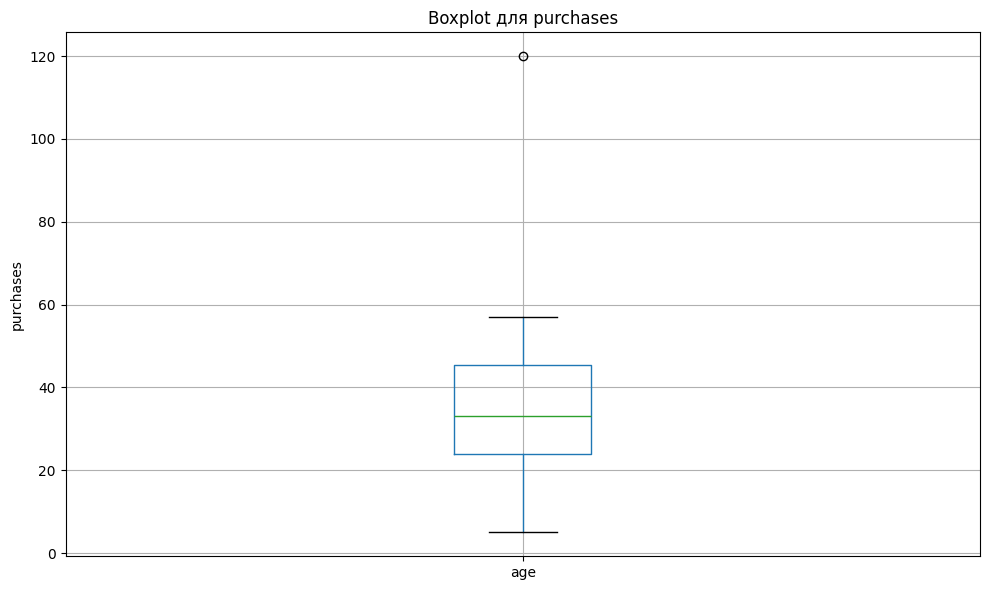

In [13]:
# 2. Boxplot для purchases
if len(numeric_cols) > 1:
    fig, ax = plt.subplots(figsize=(10, 6))
    df.boxplot(column=numeric_cols[1], ax=ax)
    ax.set_title(f'Boxplot для {'purchases'}')
    ax.set_ylabel('purchases')
    plt.tight_layout()
    plt.savefig('figures/boxplot.png', dpi=300)
    plt.show()

# Boxplot показывает 1 выброс

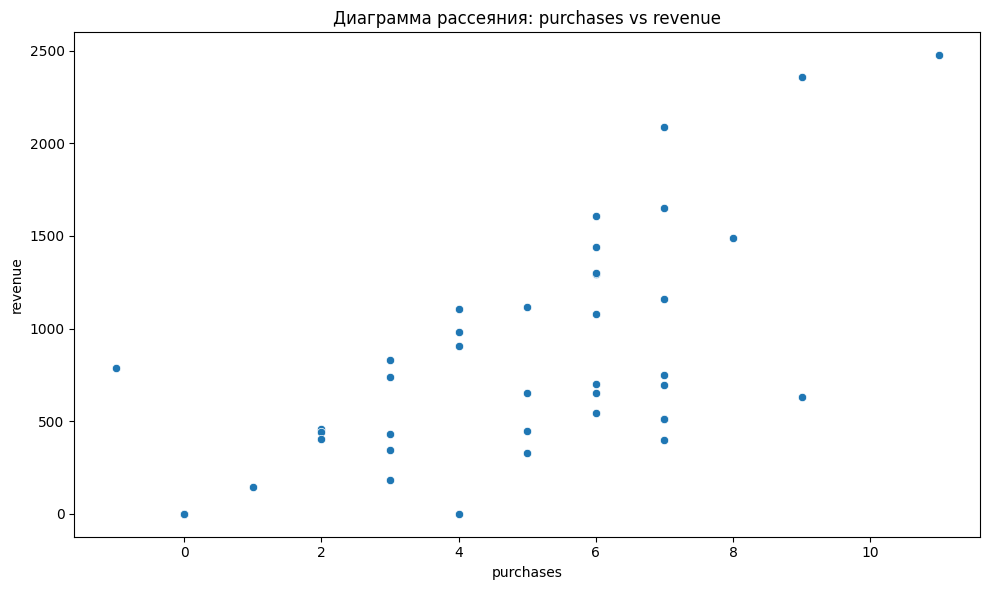

In [15]:
# 3. Scatter plot
if len(numeric_cols) > 2:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df['purchases'], df['revenue'], edgecolors='w', linewidth=0.5)
    ax.set_title(f'Диаграмма рассеяния: purchases vs revenue')
    ax.set_xlabel('purchases')
    ax.set_ylabel('revenue')
    plt.tight_layout()
    plt.savefig('figures/scatter.png', dpi=300)
    plt.show()

# По большей части - прямая зависимость, высокая корреляция